# Stock Trading Analysis Practice Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
plt.style.use('seaborn-white')
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

## Loading Data

In [3]:
ts = pd.read_excel('Stocks.xlsx')
ts.index= ts['date']
ts.drop(['date'], axis=1, inplace=True)
ts = ts[::-1]

In [6]:
ts.head()

,AAPL,BA,C,SBUX,IBM
date,,,,,
2018-01-02,41.246176,282.831151,66.388565,53.517513,129.078956
2018-01-03,41.238993,283.745845,66.593909,54.520444,132.627059
2018-01-04,41.430546,282.669173,67.415285,54.724745,135.313240
2018-01-05,41.902245,294.264831,67.326005,55.356220,135.974325
2018-01-08,41.746608,295.513008,66.540341,55.077628,136.794405


### Glance at Historical Data

After loading the data, it would be reasonable to take a look at the general trend, to both get an overview intuition and make sure that there is generally nothing completely wrong in data loading.

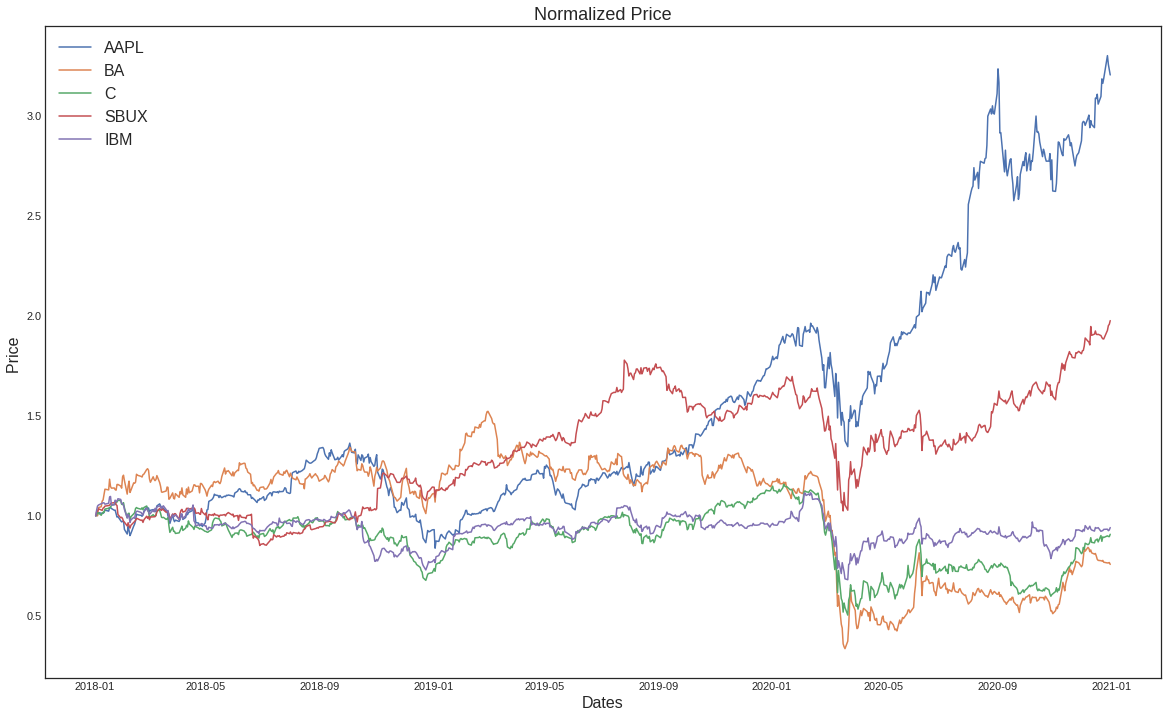

In [7]:
normalized_price = (ts/ts.iloc[0])
fig =plt.figure(figsize=(20,12))
plt.plot(normalized_price)
title_text_obj = plt.title("Normalized Price", fontsize = 18)
xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Price ', fontsize = 16)
plt.legend(('AAPL', 'BA', 'C', 'SBUX', 'IBM' ),fontsize = 16,loc = 'best')
plt.show()

## Return

In order to achieve the optimal trading strategy, one has to maximize return (i.e. price change).

In [ ]:
AAPL_return = ts['AAPL'].pct_change()

# get a glance of what the data looks like
AAPL_return.head()

date
2018-01-02         NaN
2018-01-03   -0.000174
2018-01-04    0.004645
2018-01-05    0.011385
2018-01-08   -0.003714
Name: AAPL, dtype: float64

In [ ]:
BA_return = ts['BA'].pct_change()
C_return = ts['C'].pct_change()
SBUX_return = ts['SBUX'].pct_change()
IBM_return = ts['IBM'].pct_change()

returns = ts.pct_change()

In [ ]:
returns

,AAPL,BA,C,SBUX,IBM
date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.003234,0.003093,0.018740,0.027488
2018-01-04,0.004645,-0.003794,0.012334,0.003747,0.020254
2018-01-05,0.011385,0.041022,-0.001324,0.011539,0.004886
2018-01-08,-0.003714,0.004242,-0.011670,-0.005033,0.006031
...,...,...,...,...,...
2020-12-24,0.007712,-0.011562,-0.003455,-0.000490,0.006376
2020-12-28,0.035766,-0.004881,0.009246,0.022841,0.001043
2020-12-29,-0.013315,0.000740,-0.003599,0.012363,-0.008172


Now there are $N$ stocks，and the $i-th$ stock has return $R_i$ with expectation $r_i$. 

Thus, define
${R}=\left( \begin{array}{c}R_1\\ \vdots\\R_N\end{array}\right)$, 
then：
$E({R})=\left( \begin{array}{c} r_1\\ \vdots\\r_N\end{array}\right)$

In order to get the expectation, the most intuitive way is to use the history average data.

In [ ]:
returns.mean()

AAPL    0.001787
BA      0.000259
C       0.000252
SBUX    0.001099
IBM     0.000099
dtype: float64

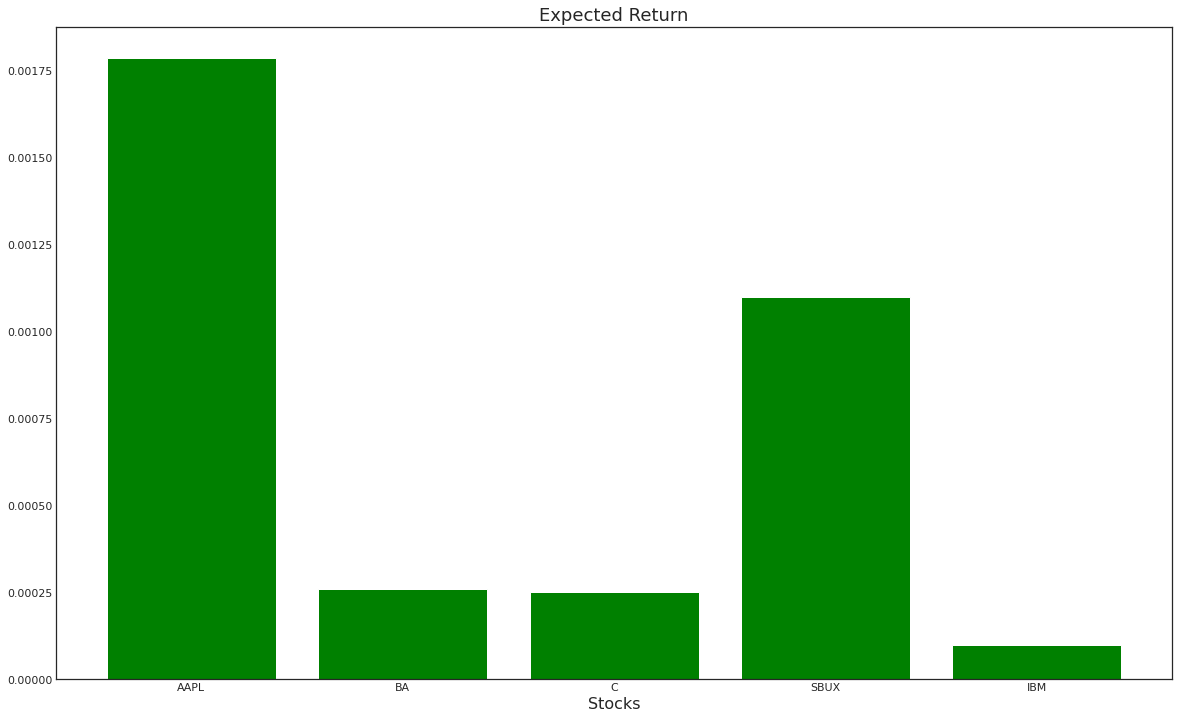

In [ ]:
fig =plt.figure(figsize=(20,12))
plt.bar(['AAPL', 'BA', 'C', 'SBUX', 'IBM'], returns.mean().values, color='green')
title_text_obj = plt.title("Expected Return", fontsize = 18)
xlabel_obj = plt.xlabel('Stocks', fontsize = 16)
plt.show()